### 분석 실습

#### 타이타닉 생존자 예측모델 개발 및 평가(아래 사항들 반영 필수)
- Titanic data 전처리
    - 분석 데이터 : titanic3.csv
    - 재사용 가능한 전처리 사용자 함수 작성 하여 일괄 전처리 Null 값 처리
    - 탐색적 분석을 통한 변수 선정 및 파생변수 생성 
    - 훈련 데이터 : 검증 데이터 = 8:2
    - 분류모델 : Decision Tree, Random Forest, Logistic Regression 3개 모두 적용
    - 평가 : 사이킷런 metrics 사용, 다음 항목들을 포함하는 사용자 함수 def get_clf_eval(y_test, pred)을 작성하여 일괄 처리
    \
    confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
    - 모델 개발 및 평가 결과에 대한 종합 의견


- 컬럼 정보
    - survived : 생존여부(1: 생존, 0 : 사망)
    - pclass : 승선권 클래스(1 : 1st, 2 : 2nd ,3 : 3rd)
    - name : 승객 이름
    - sex : 승객 성별
    - age : 승객 나이
    - sibsp : 동반한 형제자매, 배우자 수
    - parch : 동반한 부모, 자식 수
    - ticket : 티켓의 고유 넘버
    - fare 티켓의 요금
    - cabin : 객실 번호
    - embarked : 승선한 항구명(C : Cherbourg, Q : Queenstown, S : Southampton)
    - boat
    - body
    - home.dest


In [1]:
import numpy as np

In [10]:
import pandas as pd
df = pd.read_csv('titanic3.csv')
df

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",female,14.50,1,0,2665,14.4542,NaN,C,NaN,328.0,NaN
1305,3,0,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.50,0,0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3,0,"Zakarian, Mr. Ortin",male,27.00,0,0,2670,7.2250,NaN,C,NaN,NaN,NaN


그림 범주화 그룹핑 히트맵 막대그래프 
클라스로해도 되고 사용자함수 만들어 널처리 불필요속성제거 레이블인코딩
모델링 및 평가


In [11]:
df.isnull().sum()

pclass          0
survived        0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64

In [12]:
df.age.replace(np.nan, df.age.mean(), inplace=True)
df.dropna(subset=['fare'], inplace=True)
df.dropna(subset=['embarked'], inplace=True)
df.drop('body', axis=1)

df.isnull().sum()


pclass          0
survived        0
name            0
sex             0
age             0
sibsp           0
parch           0
ticket          0
fare            0
cabin        1013
embarked        0
boat          822
body         1186
home.dest     562
dtype: int64

In [74]:
df.cabin.unique()

array(['B5', 'C22 C26', 'E12', 'D7', 'A36', 'C101', nan, 'C62 C64', 'B35',
       'A23', 'B58 B60', 'D15', 'C6', 'D35', 'C148', 'C97', 'B49', 'C99',
       'C52', 'T', 'A31', 'C7', 'C103', 'D22', 'E33', 'A21', 'B10', 'B4',
       'E40', 'B38', 'E24', 'B51 B53 B55', 'B96 B98', 'C46', 'E31', 'E8',
       'B61', 'B77', 'A9', 'C89', 'A14', 'E58', 'E49', 'E52', 'E45',
       'B22', 'B26', 'C85', 'E17', 'B71', 'B20', 'A34', 'C86', 'A16',
       'A20', 'A18', 'C54', 'C45', 'D20', 'A29', 'C95', 'E25', 'C111',
       'C23 C25 C27', 'E36', 'D34', 'D40', 'B39', 'B41', 'B102', 'C123',
       'E63', 'C130', 'B86', 'C92', 'A5', 'C51', 'B42', 'C91', 'C125',
       'D10 D12', 'B82 B84', 'E50', 'D33', 'C83', 'B94', 'D49', 'D45',
       'B69', 'B11', 'E46', 'C39', 'B18', 'D11', 'C93', 'C49',
       'B52 B54 B56', 'E60', 'C132', 'B37', 'D21', 'D19', 'C124', 'D17',
       'B101', 'D28', 'D6', 'D9', 'B80', 'C106', 'B79', 'C47', 'D30',
       'C90', 'E38', 'C78', 'C30', 'C118', 'D36', 'D48', 'D47', 'C105',


In [13]:
df.loc[(df['survived']==0), 'cabin'].value_counts()
#len(df.loc[(df['survived']==0), 'cabin'])

C22 C26        3
C23 C25 C27    2
G6             2
F G73          2
F2             2
              ..
B94            1
C83            1
B82 B84        1
C91            1
F38            1
Name: cabin, Length: 90, dtype: int64

In [16]:
len(df.loc[(df['survived']==0), 'cabin'])

808

In [72]:
df.loc[(df['survived']==0), 'cabin'].isnull().sum()

706

In [14]:
df.loc[(df['survived']==1), 'cabin'].value_counts()
#len(df.loc[(df['survived']==1), 'cabin'])

C23 C25 C27        4
B96 B98            4
B57 B59 B63 B66    4
F33                4
F4                 4
                  ..
E40                1
B69                1
C22 C26            1
D49                1
D45                1
Name: cabin, Length: 128, dtype: int64

In [17]:
len(df.loc[(df['survived']==1), 'cabin'])

498

In [71]:
df.loc[(df['survived']==1), 'cabin'].isnull().sum()

307

In [15]:
t_df = df[['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'cabin', 'embarked', 'survived']]
t_df

,pclass,sex,age,sibsp,parch,fare,cabin,embarked,survived
0,1,female,29.000000,0,0,211.3375,B5,S,1
1,1,male,0.920000,1,2,151.5500,C22 C26,S,1
2,1,female,2.000000,1,2,151.5500,C22 C26,S,0
3,1,male,30.000000,1,2,151.5500,C22 C26,S,0
4,1,female,25.000000,1,2,151.5500,C22 C26,S,0
...,...,...,...,...,...,...,...,...,...
1304,3,female,14.500000,1,0,14.4542,NaN,C,0
1305,3,female,29.881138,1,0,14.4542,NaN,C,0
1306,3,male,26.500000,0,0,7.2250,NaN,C,0
1307,3,male,27.000000,0,0,7.2250,NaN,C,0


Text(0.5, 1.0, 'Heatmap od the Dataset')

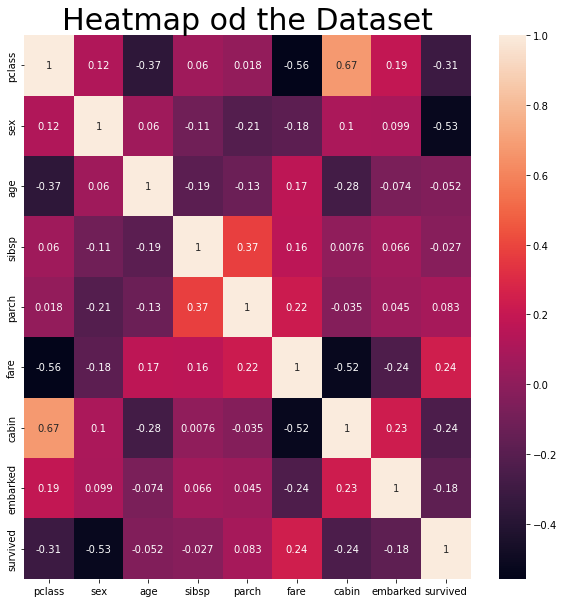

In [73]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,10))
sns.heatmap(t_df[['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'cabin', 'embarked', 'survived']].corr(), annot=True)
plt.title('Heatmap od the Dataset', fontsize=30)

생존률과 가장 연관 있는것은 1.sex,  2.pclass,  3. cabin 4. embarked 그중 1,2는 건들게 없고  3.cabin은 널값이 너무 많음 .. 

In [ ]:
벨류가 여러가지라 레이블인코딩을 했을때 의미없는 숫자가 커져서 그 차이가 머신러닝에 영향을 끼침 
그래서 원핫 인코딩 추천

In [45]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
features = ['sex','embarked', 'cabin']
for f in features:
    t_df[f] = le.fit_transform(df[f])
t_df.head()

C:\Users\SANGYUN\AppData\Local\Temp\ipykernel_10120\217706567.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  t_df[f] = le.fit_transform(df[f])


,pclass,sex,age,sibsp,parch,fare,cabin,embarked,survived
0,1,0,29.00,0,0,211.3375,42,2,1
1,1,1,0.92,1,2,151.5500,78,2,1
2,1,0,2.00,1,2,151.5500,78,2,0
3,1,1,30.00,1,2,151.5500,78,2,0
4,1,0,25.00,1,2,151.5500,78,2,0


분석용 데이터셋 준비
중복 탈락시키자( fare 삭제)


In [61]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

# 독립변수, 종속변수 분리
X = t_df[['pclass', 'sex', 'age', 'sibsp', 'parch', 'cabin', 'embarked']]
y = t_df['survived']

# 학습용 테이터와 평가용 데이터를 8:2로 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10) 
print(X_train.shape)
print(X_test.shape)

(1044, 8)
(262, 8)


In [60]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
features = ['sex','embarked', 'cabin']
for f in features:
    X[f] = le.fit_transform(X[f])
X.head()

C:\Users\SANGYUN\AppData\Local\Temp\ipykernel_10120\450180376.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[f] = le.fit_transform(X[f])


,pclass,sex,age,sibsp,parch,fare,cabin,embarked
0,1,0,29.00,0,0,211.3375,42,2
1,1,1,0.92,1,2,151.5500,78,2
2,1,0,2.00,1,2,151.5500,78,2
3,1,1,30.00,1,2,151.5500,78,2
4,1,0,25.00,1,2,151.5500,78,2


# 모델링 및 평가 도구

In [62]:
# Decision Tree
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
dt_pred = dt_model.predict(X_test)

print(dt_pred[0:10])
print(y_test.values[0:10])

accuracy = accuracy_score(y_test, dt_pred)
print('dt 예측 정확도 :', accuracy)


[0 0 0 1 0 1 0 0 1 0]
[0 1 0 1 0 1 1 1 1 0]
dt 예측 정확도 : 0.7557251908396947


In [63]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

rf_accuracy = accuracy_score(y_test, rf_pred)
print('rf 예측 정확도 :', rf_accuracy)


rf 예측 정확도 : 0.7824427480916031


In [64]:
# Logistic Regression
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(random_state=0)
lr_model.fit(X_train,y_train)
lr_pred = lr_model.predict(X_test)

lr_accuracy = accuracy_score(y_test, lr_pred)
print('lr 예측 정확도 :', accuracy)


lr 예측 정확도 : 0.7557251908396947
